# Parcial #2
### Juan Esteban Ospina Holguín - 1007374246

In [1]:
#Librerías 
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy import optimize
import scipy.interpolate as interpolate
import scipy.integrate as integrate
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
from scipy.interpolate import CubicSpline
from datetime import datetime, date, time, timedelta
import calendar
init_printing() 

# A)
Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

In [2]:
path = "https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json"
Df = pd.read_json(path)#Se hace un Data Frame de los datos

Se considera un modelo de caída libre, esto quiere decir que la función del número de seguidores deber ser de la forma:
$$
f(t) = \frac{a}{2}t^2+v_0t+x_0      (1)
$$
Dónde $a$ es la aceleración, $v_0$ es la velocidad inicial y $x_0$ es la cantidad inicial de seguidores.


In [3]:
def f(x,a,b,c):
        return a*x**2+b*x+c #Función a la que se aproximará la distribución de los datos

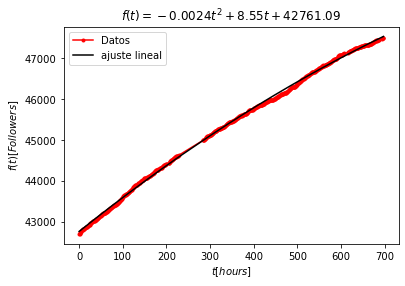

In [4]:
a = optimize.curve_fit( f,Df.hours,Df.followers,p0 =[4,400,40000])[0][0]#Se hace un ajuste a la función ax^2+bx+c
b = optimize.curve_fit( f,Df.hours,Df.followers,p0 =[4,400,40000])[0][1]
c = optimize.curve_fit( f,Df.hours,Df.followers,p0 =[4,400,40000])[0][2]

plt.plot(Df.hours, Df.followers,'o-',markersize=3,color ="red",label = 'Datos')#grafica: datos
plt.plot(Df.hours,f(Df.hours,a,b,c),color = 'black',label = 'ajuste lineal')#grafica del ajuste 
plt.xlabel('$t[hours]$')#etiquetas
plt.ylabel('$f(t)[Followers]$')
plt.title('$f(t) =-0.0024t^2+8.55t+42761.09$ ')
plt.legend();

## 1.Velocidad incial

Según la ecuación (1), tenemos que la velocidad inicial es la constante que acompaña a $t$ en el polinomio obtenido tras el ajuste lineal. Así que nuestra velocidad es:
### $v_0 = 8.55 followers/hour$


    

## 2. Aceleración 

según la ecuación (1), podemos obtener la aceleración de la constante que acompaña a $t^2$ en el polinomio obtenido tras el ajuste lineal. Así que nuestra velocidad es:
### $$-0.0024 = \frac{a}{2}\\
a = -0.0048
followers/hour^2$$



## 3.El número máximo de seguidores que alcanzaría el perfil

In [5]:
p = np.polynomial.polynomial.Polynomial([c,b,a])#Polinomio del número de seguidores
v = p.deriv()#Velocidad de crecimiento
round(p(v.roots()[0])) #Se muestra el máximo dado por la raíz de la derivada

El número máximo de seguidores se obtiene cuando la velocidad se hace cero, por eso derivamos, igualamos a cero y obtenemos que el máximo de seguidores es $f_{max} = 50262$

## 4.La fecha en la que se alcanzaría dicho máximo

In [6]:
horasT = v.roots()[0]#Horas para que se alcance el máximo
horasT

Se necesita que pasen 1754.19 horas para que se llegue al máximo, calculemos cuando es la nueva fecha a partir de la primera lectura hecha.


In [7]:
#Fecha inicial
f0 = Df.iloc[0]['date_time']
f0

Timestamp('2021-08-04 22:06:53.668000')

In [8]:
fecha_inicial =datetime(2021, 8,4,22,6,53)#Se convierte la fecha inicial a formato datetime
print('fecha inicial:',fecha_inicial)
día =fecha_inicial  + timedelta(hours=horasT)#Se suman las horas a la fecha inicial
print('fecha final:',día)

fecha inicial: 2021-08-04 22:06:53
fecha final: 2021-10-17 00:18:28.018643


Así, para el 17 de octubre del año 2021 a las 6:28 pm, se espera que este usuario tenga su número máximo de seguidores según el modelo planteado.



# B)
El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

# 1. 
Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  

In [9]:
I = lambda α: integrate.quad(lambda ϕ:1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2),0,np.pi/2)[0]#Calculo de la integral
def divi(t):
    """
    Función para calcular T/T0
    """
    f=np.vectorize(I)
    return f(t)*2/np.pi

In [10]:
α = np.linspace(0,np.pi/2,100) # defino el conjunto de valores de α
l=1 # Longitud de la cuerda l =1

divi(α)#Cociente T/T0

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

## 2.
Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 


In [11]:
    Df = pd.DataFrame({"α[rad]": α, "α[°]": α*180/np.pi, "cociente": divi(α)})  # Se construye el Data Frame con el cociente T/T0
Df

,α[rad],α[°],cociente
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


# 3.
Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 

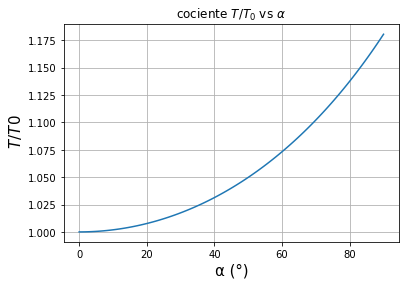

In [12]:
plt.plot( Df['α[°]'], Df.cociente )#Grafica 
plt.xlabel('α (°)' ,size=15)#Etiquetas
plt.ylabel(' $T/T0$' ,size=15)
plt.grid()
plt.title('cociente $T/T_0$ vs $α$')
plt.show()

# 4.
Explain the result when $\alpha = 0.$ 

Cuando α tiene a se cero, significa que el péndulo oscila con una amplitud pequeña y como podemos ver en la grafica anterior, el cociente $\frac{T}{T_0}$ tiende a ser $1$, o de igual modo $T\Rightarrow T_0$